In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
data=pd.read_csv("data/Diabetes.csv")


In [35]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
data.shape

(768, 9)

In [37]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Note: The minimum value of the features `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI` is 0. This is logically incorrect as these values cannot be 0. Thus, this can be safely called "missing data" in our case. We need to either drop the 0-valued rows or we need to replace them with the *mean* or *median* value of that feature

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
data['Outcome'].value_counts(normalize=True)*100


Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [40]:
data.duplicated().sum()

0

In [41]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

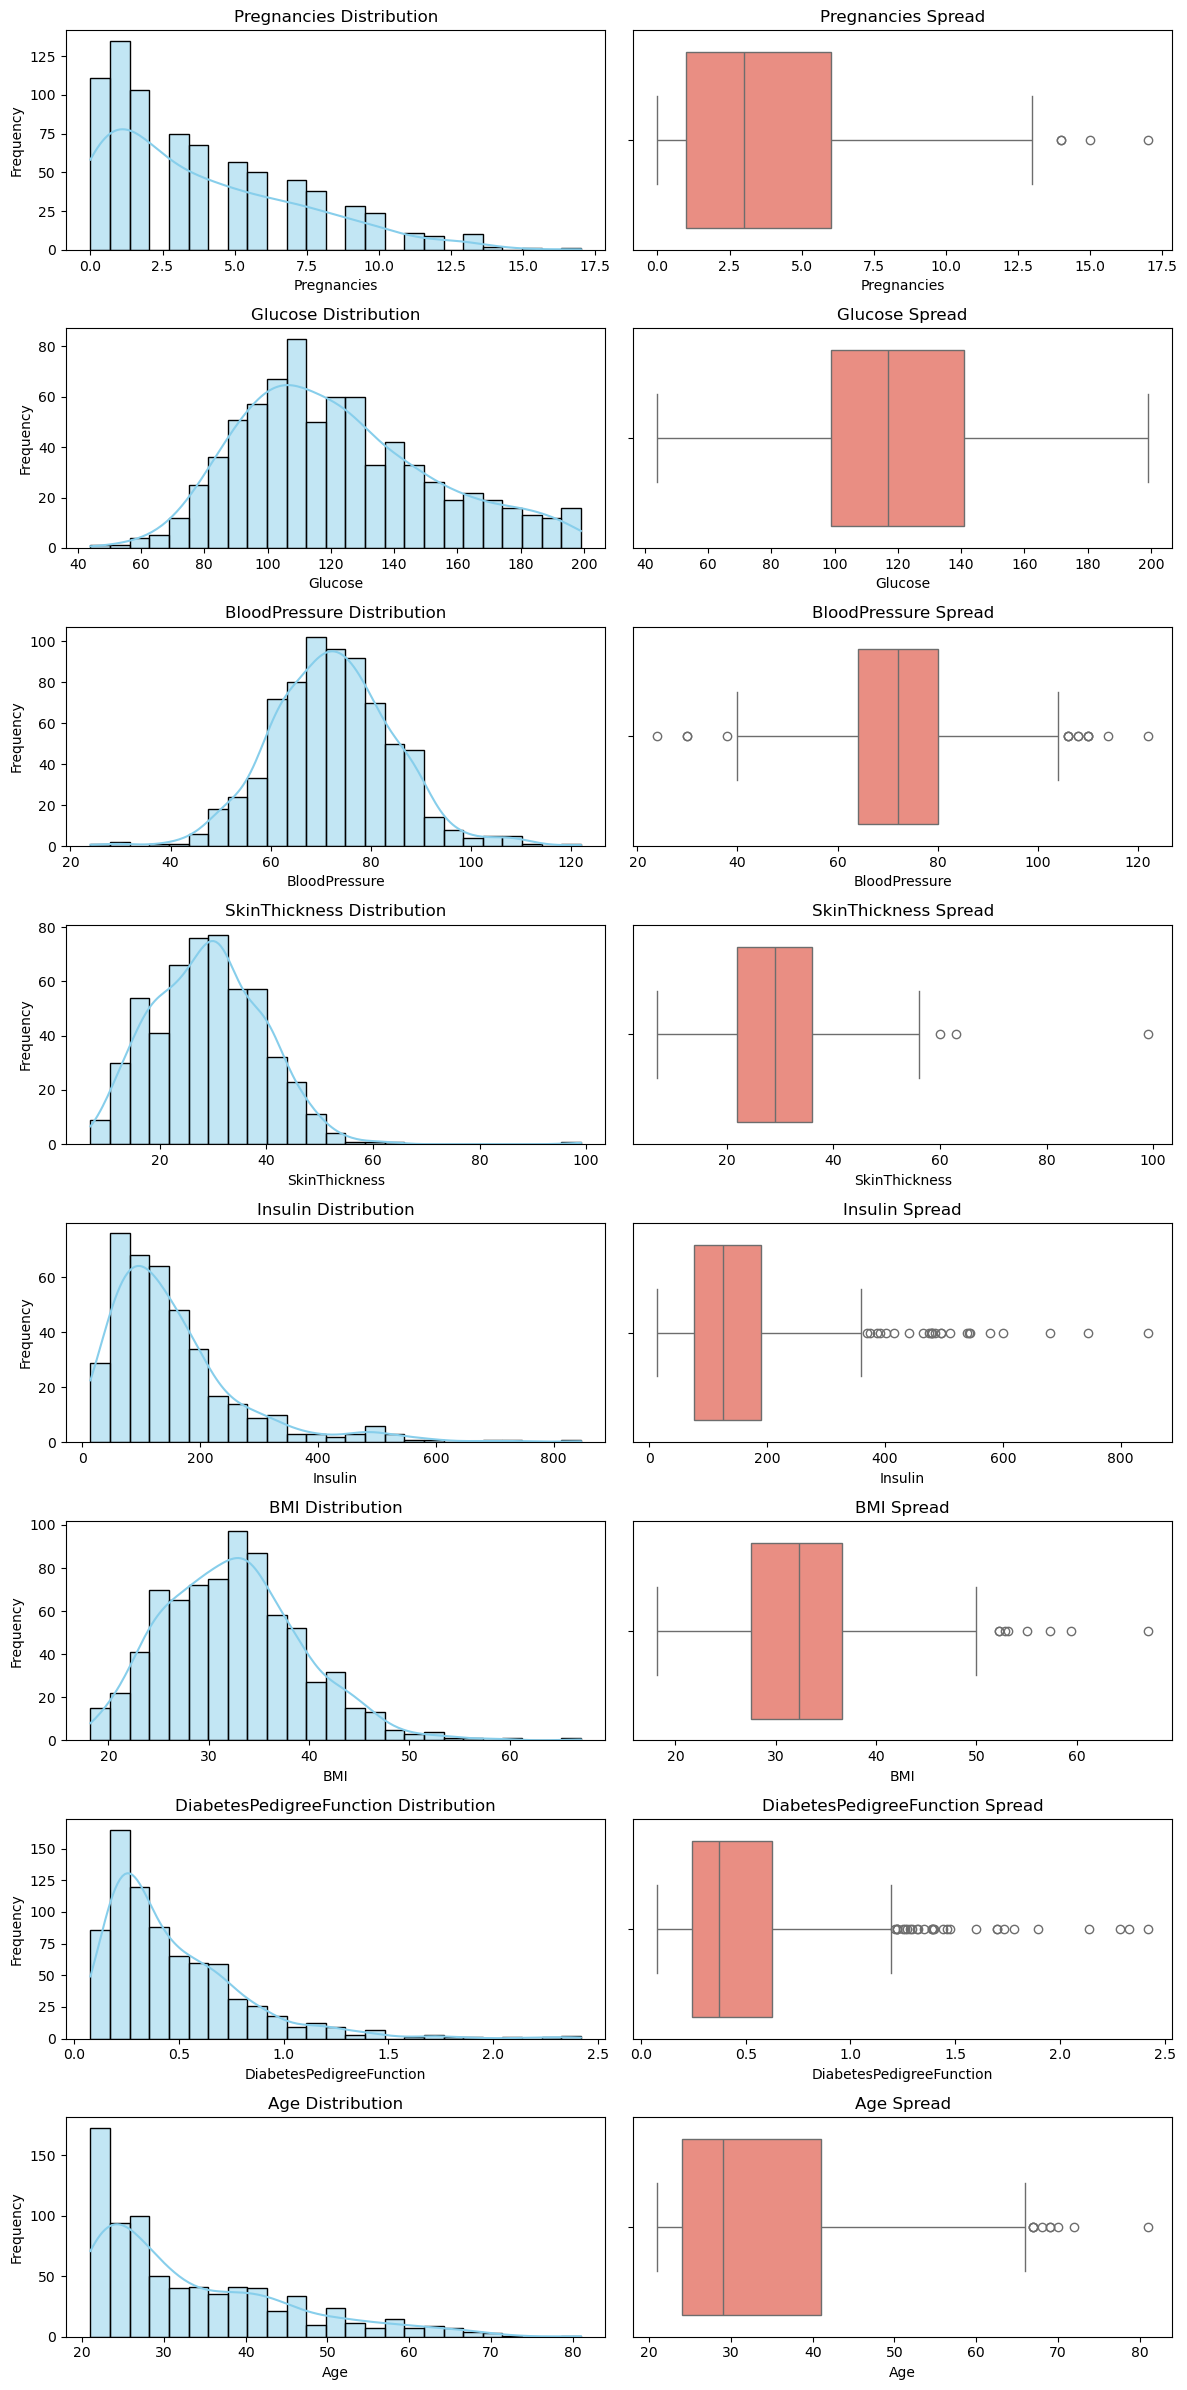

In [27]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('Outcome')
plt.figure(figsize=(12, len(num_cols)*3))

for i, col in enumerate(num_cols):
    # Histogram
    plt.subplot(len(num_cols), 2, 2*i + 1)
    sns.histplot(data[col], bins=25, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(num_cols), 2, 2*i + 2)
    sns.boxplot(x=data[col], color='salmon')
    plt.title(f'{col} Spread')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

For BloodPressure We observe that:​

Median (72.0) and mean (72.4) of BloodPressure lie very close to each other i.e. the distribution is more or less symmetric and uniform.
As seen from the box plot and violin plot, some outliers lie on 0-value, which I talked about earlier.
There are 35 rows with BloodPressure value as 0. This is not logical.

For insulin we observed that:<br>
The plots for Insulin are highly skewed. Also, the 0-value logical error is the most for this feature. 374 out of 768 instances have value of Insulin as 0.

We observe that:

Median (117.0) and mean (120.8) of Glucose lie very close to each other i.e. the distribution is more or less symmetric and uniform.<br>
As seen from the box plot, an outlier lies on 0-value, which I talked about earlier.<br>
There are 5 rows with Glucose value as 0. This is not logical, so we need to keep this in mind.

For BMI We observe that:

1.Median (32.3) and Mean (32.4) of BMI are very close to each other. Thus, the distribution is more or less symmetric and uniform<br>
2.Maximum BMI is 67.1<br>
3.There are 11 rows with BMI value as 0

FOR DiabetesPedigreeFunction
We observe that:

1.The histogram is higly skewed on the left side.<br>
2.There are many outliers in the Box plot.<br>
3.Violin plot distribution is dense in the interval 0.0 - 1.0

for age column We  observe that:

1.The distribution of Age is skewed on the left side.<br>
2.There are some outliers in the Box plot for Age.

<Axes: xlabel='Outcome', ylabel='count'>

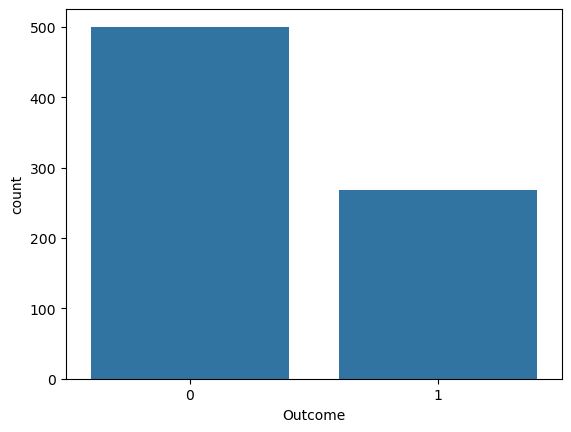

In [42]:
sns.countplot(data,x=data['Outcome'])


We observe from the above plot that:

65.1% patients in the dataset do NOT have diabetes.<br>
34.9% patients in the dataset has diabetes.

In [43]:
null_col=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [44]:
(data[null_col] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [45]:
import numpy as np

data[null_col]=data[null_col].replace(0,np.nan)

In [46]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [48]:
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.598177,72.371354,29.114583,153.180208,32.427344,0.471876,33.240885,0.348958
std,3.369578,30.496543,12.206417,9.424100,98.385308,6.886588,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.700000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Analysis of Glucose and Outcome¶<br>
Since Glucose is a continuous feature, we plot a histogram with its hue based on Outcome.

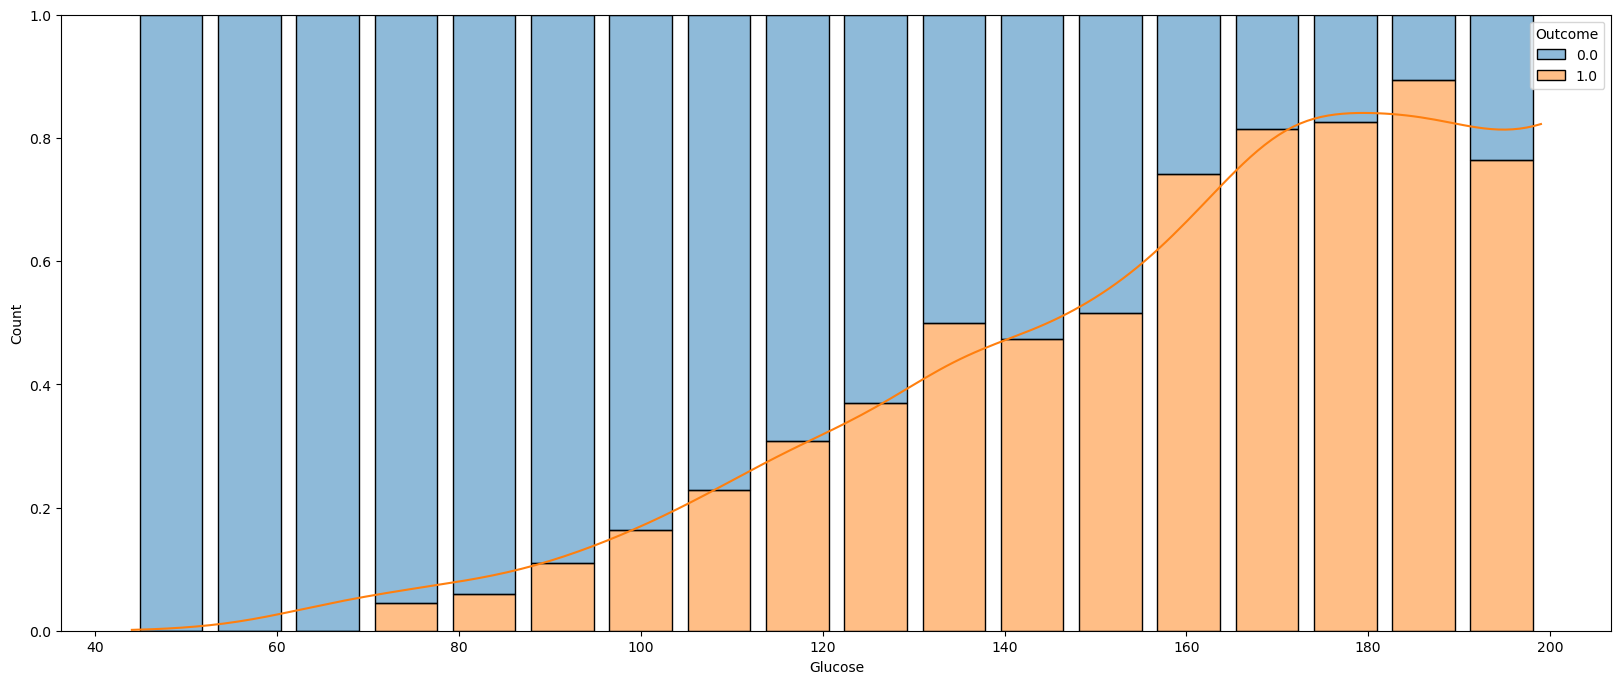

In [51]:
fig, ax1 = plt.subplots(figsize=(20, 8))

sns.histplot(data=data_imputed, x="Glucose", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax1)
plt.show()

From the above plot, we see a positive linear correlation.

1.As the value of Glucose increases, the count of patients having diabetes increases i.e. value of Outcome as 1, increases.<br>
2.Also, after the Glucose value of 125, there is a steady increase in the number of patients having Outcome of 1.<br>
So, there is a significant amount of positive linear correlation.

Analysis of BloodPressure and Outcome<br>
BloodPressure is continuous and Outcome is binary feature. So, plotting a histogram for BloodPressure with its hue based on Outcome

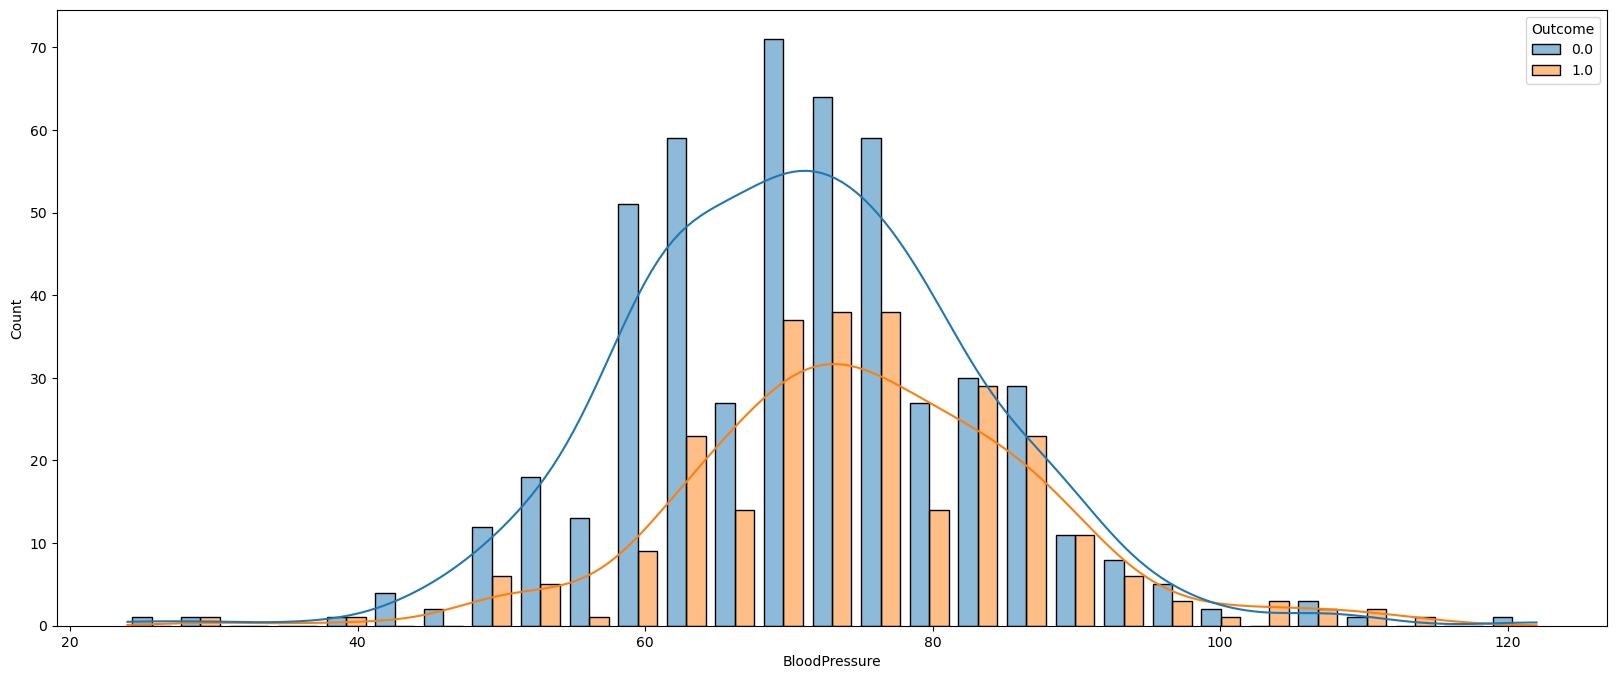

In [54]:
fig16, ax16 = plt.subplots(figsize=(20, 8))

sns.histplot(data=data_imputed, x="BloodPressure", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax16)
plt.show()

We observe that, Outcome and BloodPressure do NOT have a positive or negative linear correlation. The value of Outcome do not increase linearly as value of BloodPressure increases.

However, for BloodPressure values greater than 82, count of patients with Outcome as 1, is more

Analysis of BMI and Outcome

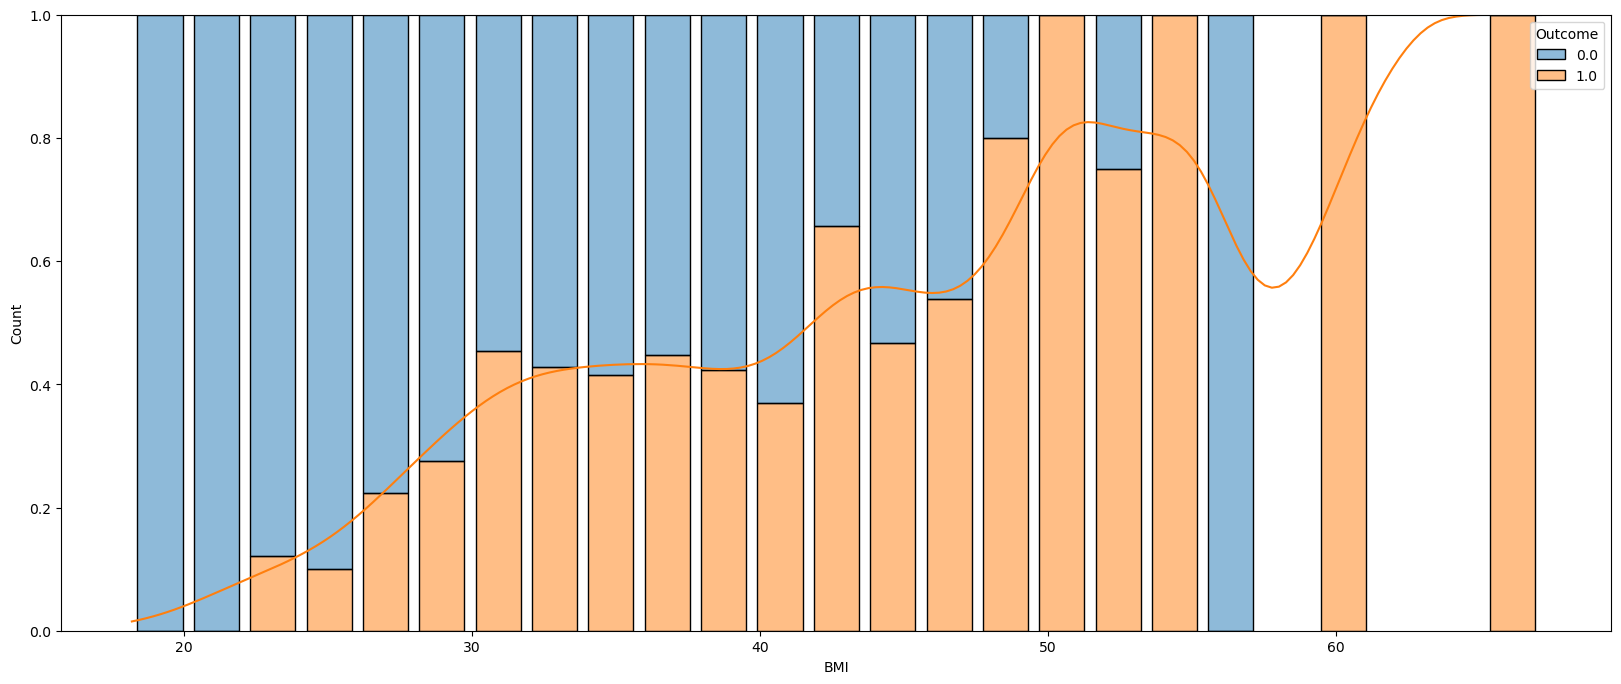

In [60]:

fig17, ax17 = plt.subplots(figsize=(20, 8))

sns.histplot(data=data_imputed, x="BMI", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax17)
plt.show()

From the above plot, a positive linear correlation is evident for BMI.

Analysis of Age and Outcome<br>
Age is continuous so plotting a histogram with hue based on Outcome

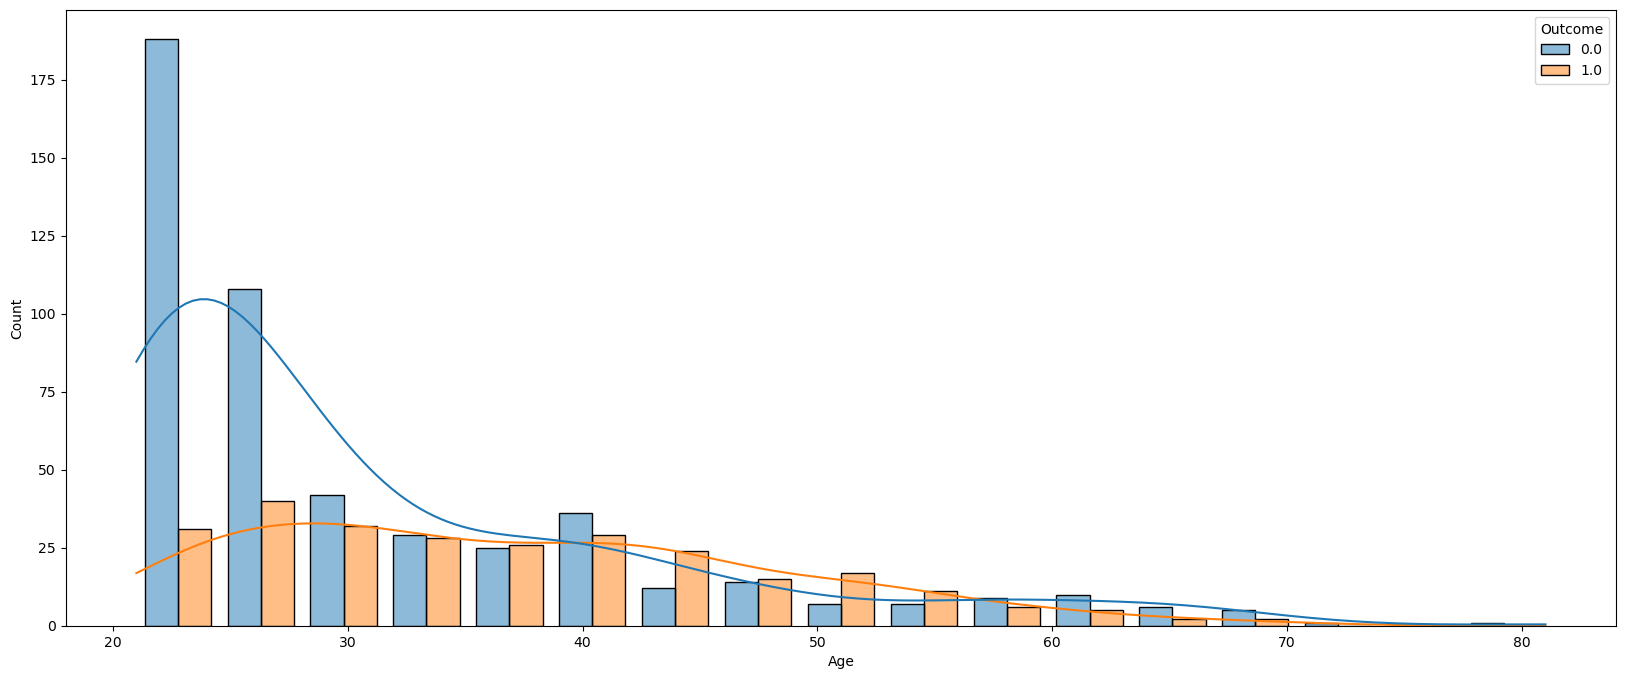

In [59]:
fig18, ax18 = plt.subplots(figsize=(20, 8))

sns.histplot(data=data_imputed, x="Age", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax18)
plt.show()

For Age greater than 35 years, the chances of patients having diabetes increases as evident from the plot i.e. The number of patients having diabetes is more than the number of people NOT having diabetes. But, it does not hold true for ages like 60+, somehow.

There is some positive linear correlation though.

Analysis of Pregnancies and Outcome

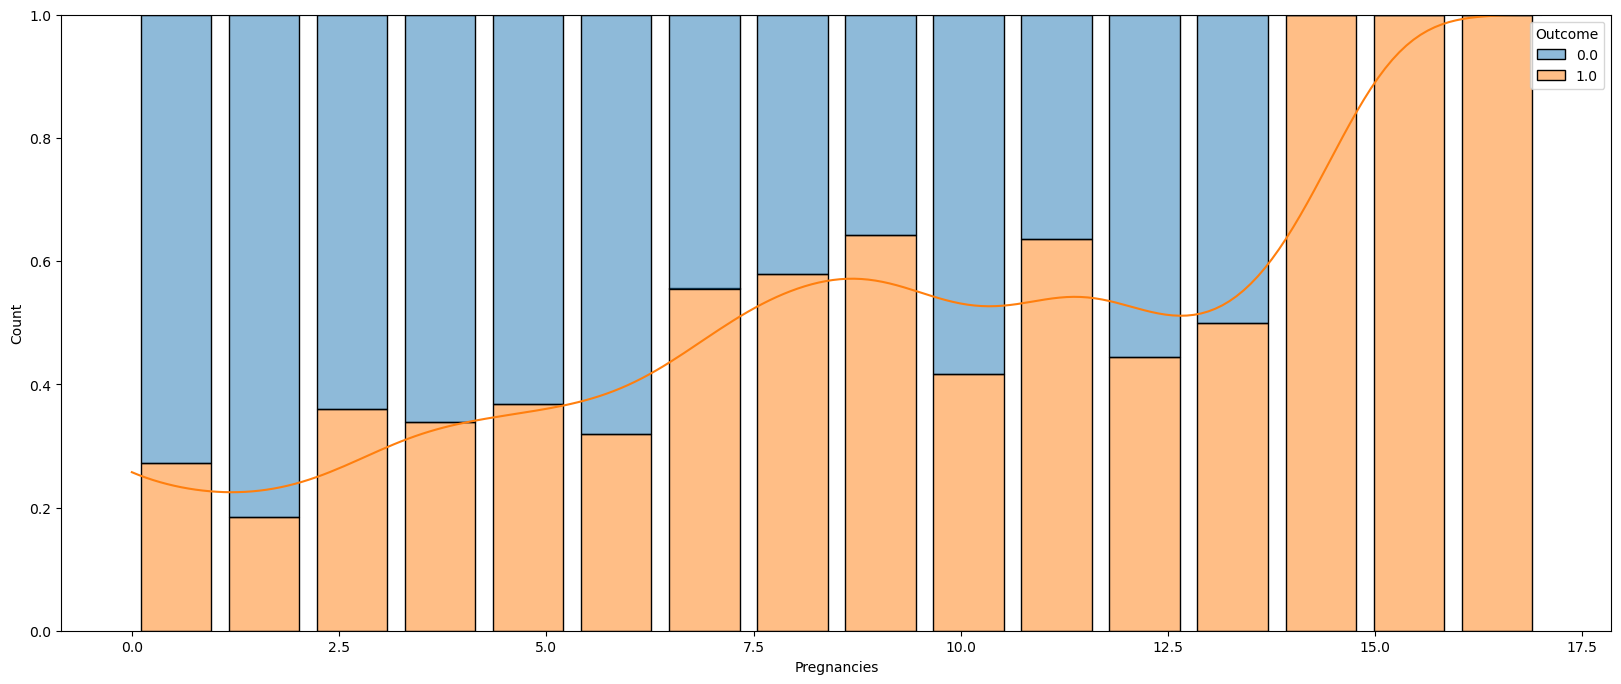

In [62]:

fig19, ax19 = plt.subplots(figsize=(20, 8))

sns.histplot(data=data_imputed, x="Pregnancies", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax19)
plt.show()

There is some positive linear correlation of Pregnancies with Outcome

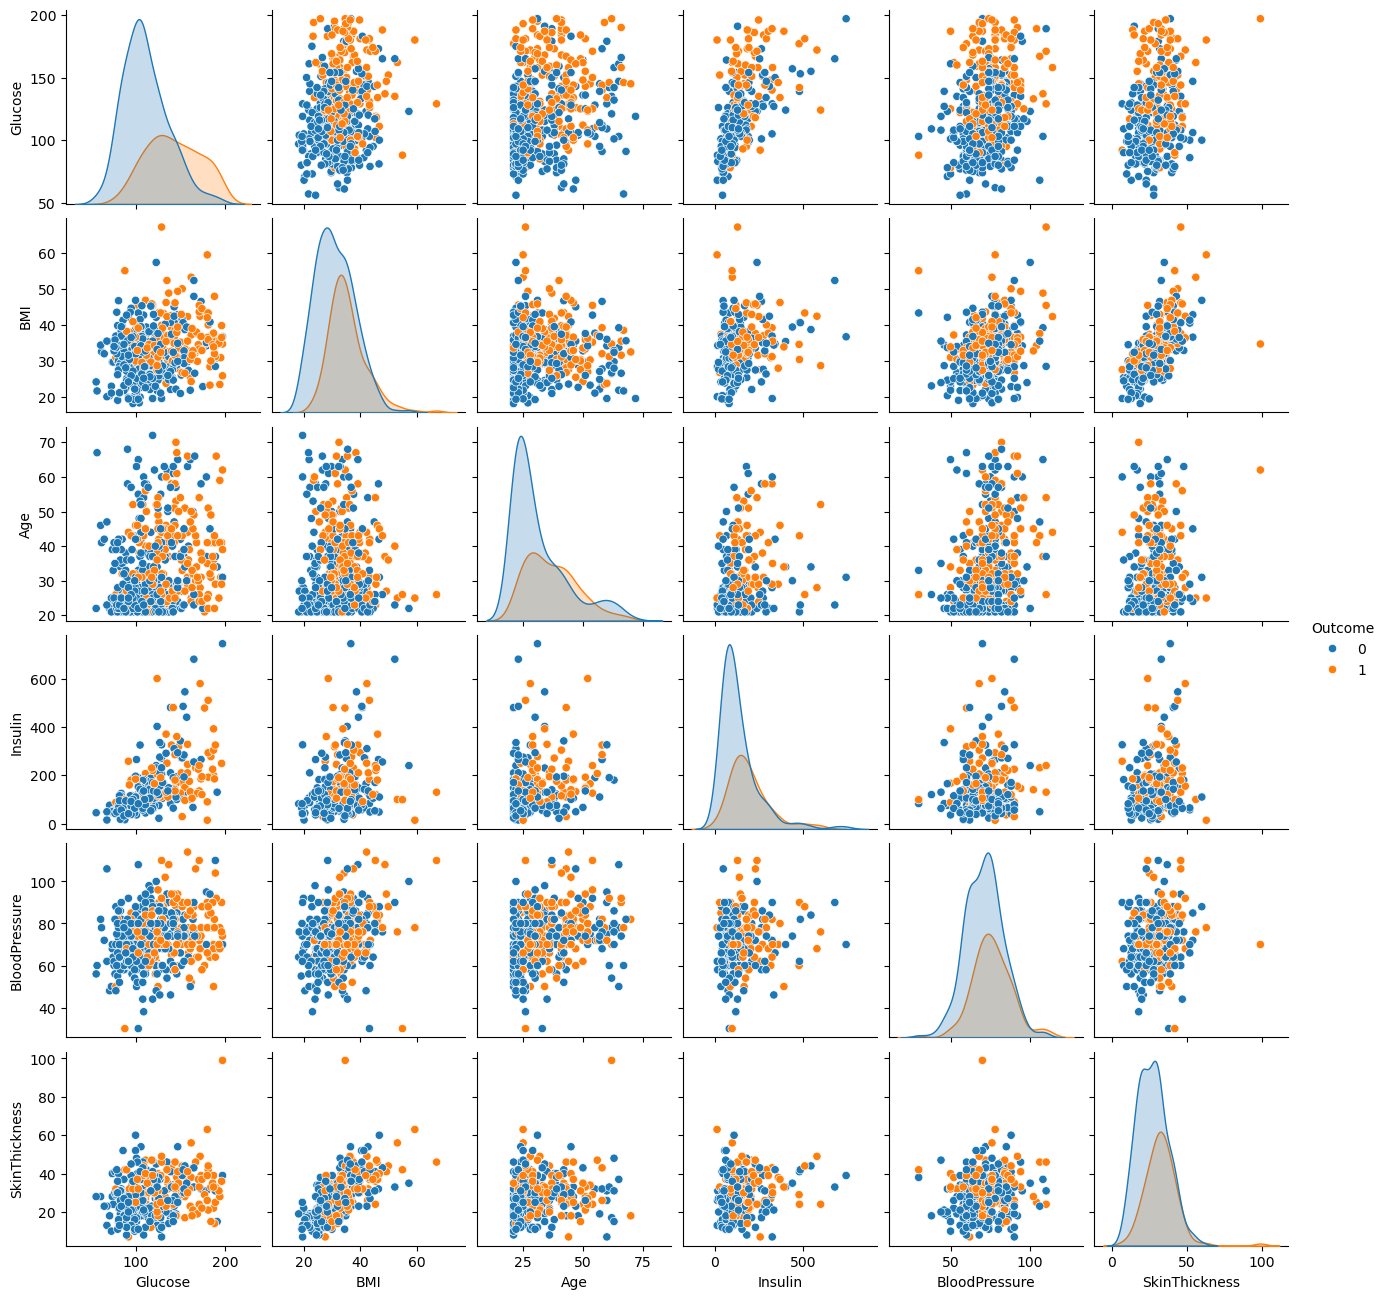

In [18]:
sample = data.sample(min(500, len(data)), random_state=42)
sns.pairplot(sample, vars=['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'SkinThickness'], hue='Outcome', diag_kind='kde', height=2.2)
plt.show()

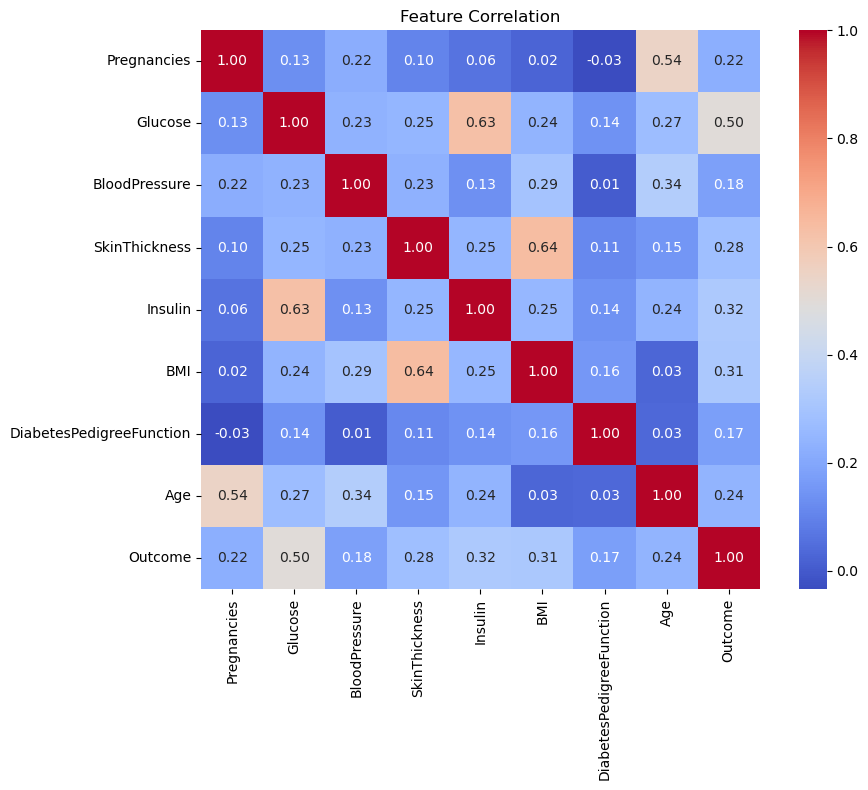

In [19]:
# Correlation heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(data_imputed.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

In [21]:
data_imputed.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.495853
Insulin                     0.320151
BMI                         0.313882
SkinThickness               0.279530
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.176665
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

We observe that:

1.Glucose has the maximum positive linear correlation with Outcome, which is logical.<br>
2.BloodPressure has the lowest positive linear correlation with Outcome.<br>
3.No feature has a negative linear correlation with Outcome